In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep, numpy as np
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [8]:
#read pickle file
#This data shows what happens when three SiPMs are placed under the Sr-90 source.

In [9]:
df_Sr = pd.read_pickle("Nov18SourceB2B.pkl")
df_Cosmic= pd.read_pickle("../jinstData/Sept2CosmicUpdated.pkl")

In [52]:
print(df_Cosmic.columns)

Index(['ch1_chisq', 'ch1_P2P_raw', 'ch1_time_raw', 'ch1_P2P_base',
       'ch1_time_base', 'ch1_P2P_smooth', 'ch1_time_smooth', 'ch1_P2P_fit',
       'ch1_time_fit', 'ch2_chisq', 'ch2_P2P_raw', 'ch2_time_raw',
       'ch2_P2P_base', 'ch2_time_base', 'ch2_P2P_smooth', 'ch2_time_smooth',
       'ch2_P2P_fit', 'ch2_time_fit', 'ch3_chisq', 'ch3_P2P_raw',
       'ch3_time_raw', 'ch3_P2P_base', 'ch3_time_base', 'ch3_P2P_smooth',
       'ch3_time_smooth', 'ch3_P2P_fit', 'ch3_time_fit', 'ch4_chisq',
       'ch4_P2P_raw', 'ch4_time_raw', 'ch4_P2P_base', 'ch4_time_base',
       'ch4_P2P_smooth', 'ch4_time_smooth', 'ch4_P2P_fit', 'ch4_time_fit',
       'time_diff', 'ch3_P2P_smooth_PE', 'ch4_P2P_smooth_PE',
       'signal_strength'],
      dtype='object')


In [10]:
#Converts milivolts to Photoelectrons

In [53]:
fit_type="smooth"
#fit_type="raw"

df_Sr.eval(f'time_diff = ch1_time_{fit_type} - ch2_time_{fit_type}', inplace=True)
df_Sr.eval('ch1_P2P_smooth_PE = (1/6.327) *ch1_P2P_smooth', inplace=True)
df_Sr.eval('ch2_P2P_smooth_PE = (1/6.344) *ch2_P2P_smooth', inplace=True)
df_Sr.eval('ch3_P2P_smooth_PE = (1/1.452) *ch3_P2P_smooth', inplace=True)
df_Sr.eval('signal_strength=(ch1_P2P_smooth_PE*ch2_P2P_smooth_PE)/(((ch1_P2P_smooth_PE**2+ch2_P2P_smooth_PE**2))**(1/2))',inplace=True)

df_Cosmic.eval(f'time_diff = ch3_time_{fit_type} - ch4_time_{fit_type}', inplace=True)
df_Cosmic.eval('ch3_P2P_smooth_PE = (1/6.344) *ch3_P2P_smooth', inplace=True)
df_Cosmic.eval('ch4_P2P_smooth_PE = (1/6.327) *ch4_P2P_smooth', inplace=True)
df_Cosmic.eval('signal_strength=(ch3_P2P_smooth_PE*ch4_P2P_smooth_PE)/(((ch3_P2P_smooth_PE**2+ch4_P2P_smooth_PE**2))**(1/2))',inplace=True)



In [61]:
#Plots the time difference under the restriction that the bottom most SiPM recevied a signal above the chosen limit

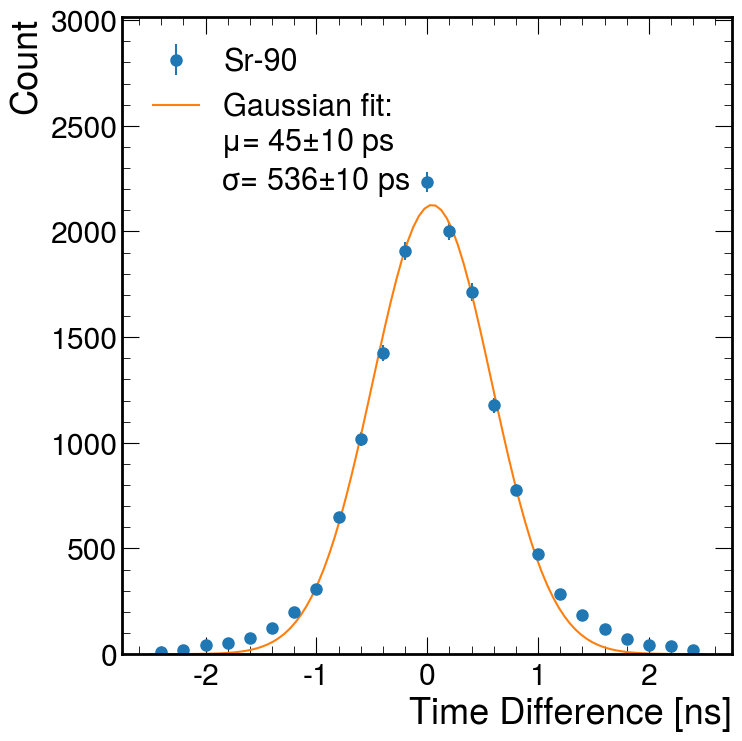

In [62]:
from scipy.optimize import curve_fit
import numpy as np



fig = plt.figure(figsize=(8,8))
#Limit in Photoelectrons of bottom SiPM to have gotten was set to 6
limit=6

hist, bin_edges = np.histogram(df_Sr.query('ch3_P2P_smooth_PE>%s'%(limit))['time_diff'],bins=25,range=(-2.5,2.5))
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#amplitude, mean, sigma
p0 = [70.,2.,0.5]

start,stop=6,-6
coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0)
hist_fit = gauss(np.linspace(-2.5, 2.5, 100), *coeff)
eb=plt.errorbar(bin_centers, y=hist, yerr=np.sqrt(hist),fmt='o', markersize=8, label='Sr-90')
curve=plt.plot(np.linspace(-2.5,2.5,100), hist_fit, label='Gaussian fit:')


plt.xlabel("Time Difference [ns]")
plt.ylabel("Count")
plt.legend(handles=[eb, curve[0]],loc=2,fontsize=22)
            
plt.text(0.16, 0.73,'$\mu$= %2.0f$\\pm%2.0f$ ps\n$\sigma$= %2.0f$\\pm%2.0f$ ps'%\
            (coeff[1]*1000,(np.sqrt(var_matrix[1][1]))*1000,coeff[2]*1000,np.sqrt(var_matrix[2][2])*1000),
         transform=plt.gca().transAxes, fontsize=22)

plt.ylim(0,max(hist)*1.35)

#plt.title('\n Time Difference Between SiPM Boards\n')
plt.tight_layout()
plt.savefig("Nov18SourceTimeDiff_SJP.pdf")
#plt.savefig('Nov18SourceTimeDiff.png')

In [38]:
#Plots Signal Strength with time resolution, you might get a warning for some reason

start,stop= 7 -7
chi2= 20.556500284623603 ndof= 18 pval= 0.3023753816078011


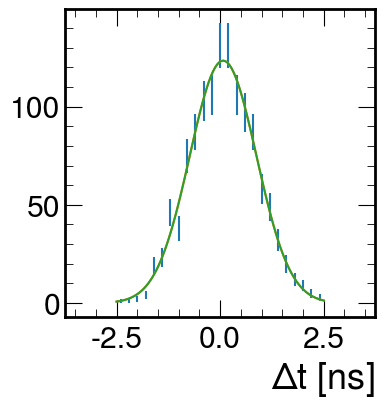

start,stop= 9 -9
chi2= 22.299069772321644 ndof= 14 pval= 0.07267456295871348


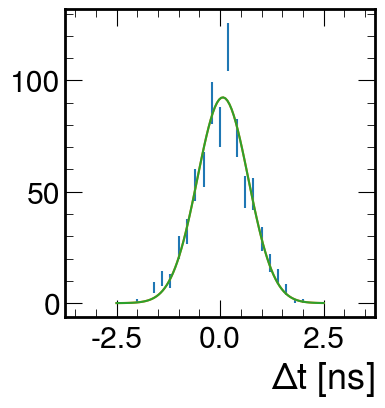

start,stop= 10 -10
chi2= 15.774418147443507 ndof= 12 pval= 0.20178796395429827


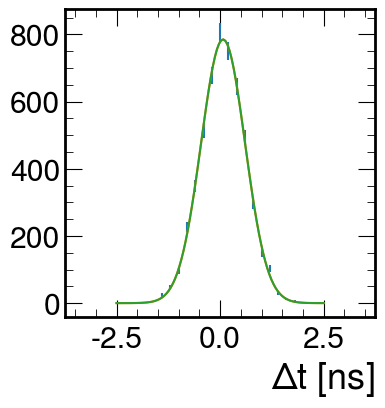

start,stop= 11 -11
chi2= 14.253408393847376 ndof= 10 pval= 0.16174349446912517


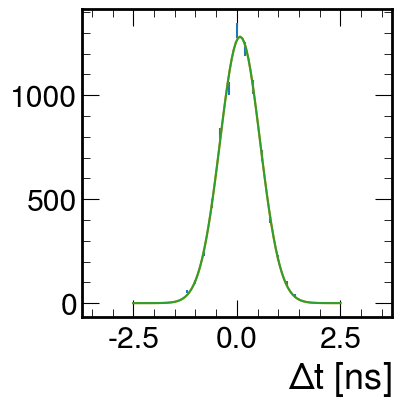

start,stop= 11 -11
chi2= 11.31905789687346 ndof= 10 pval= 0.33320668216670885


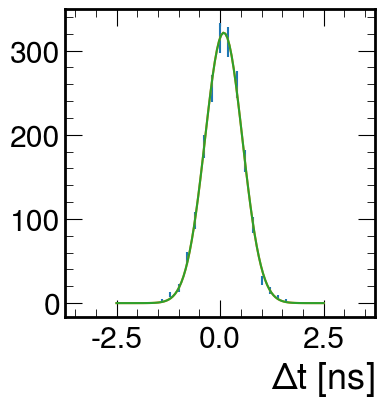

start,stop= 12 -12
chi2= 13.774358206647005 ndof= 8 pval= 0.08783959755349786


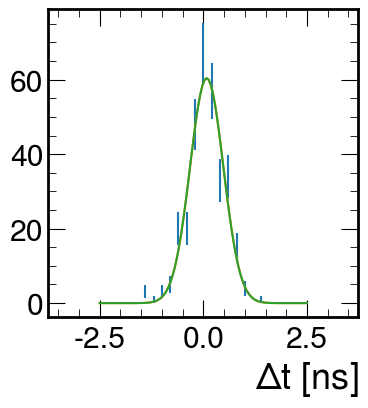

start,stop= 11 -11
chi2= 4.969984781798069 ndof= 10 pval= 0.89317401555808


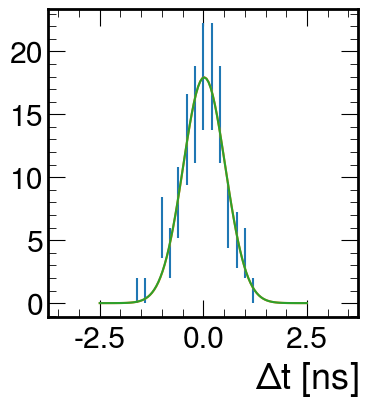

start,stop= 10 -10
chi2= 18.22958371148779 ndof= 12 pval= 0.10889531158088321


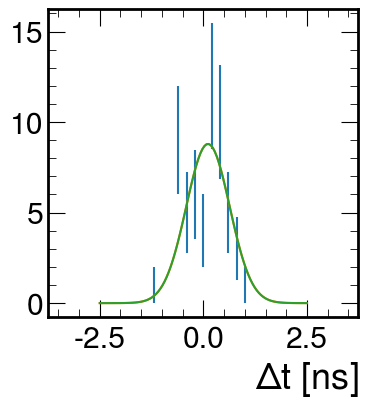

40.38111024006827
fit value A=  3211.464103527807


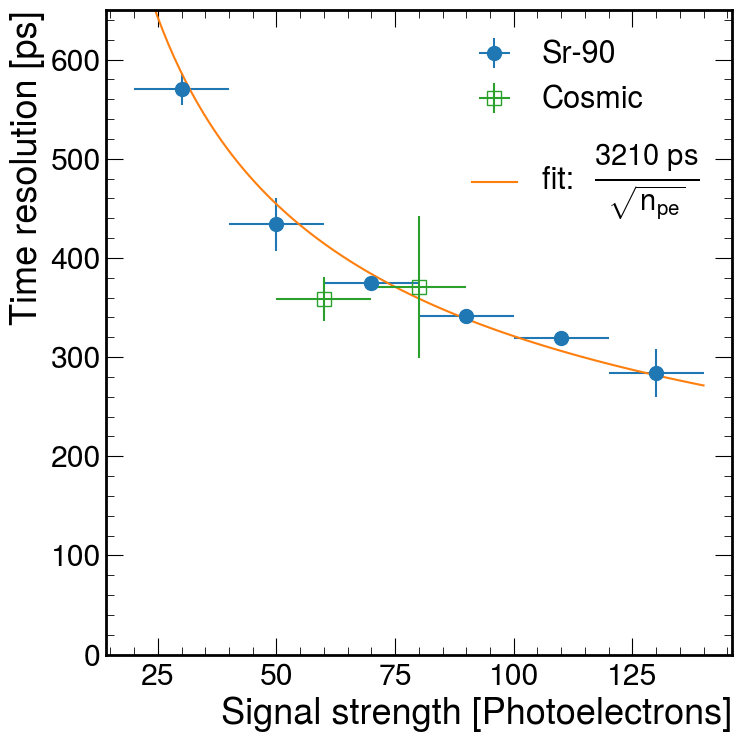

[20.556500284623603, 22.299069772321644, 15.774418147443507, 14.253408393847376, 11.31905789687346, 13.774358206647005, 4.969984781798069, 18.22958371148779]
[-0.17391273  0.37299798 -0.02839757 -0.31639672 -0.28196999 -0.33956927
 -0.90764656  0.52911068]


In [50]:
#modified version
sigma_t  = np.array([])
sigma_t_error = np.array([])
sigma_t_error_syst = np.array([])
centers = np.array([])
xerrors = np.array([])

from scipy.stats import chi2

chi2s=[]



photobins_Sr = [20,40, 60,80, 100,120, 140]
photobins_Cosmic = [50, 70,90]

limit=6


dfq=df_Sr#.query(f'ch3_P2P_smooth_PE>{limit}')
for j in range(2):
    if j == 0:
        photobins = photobins_Sr
        dfq=df_Sr
        cha,chb=1,2
    if j == 1:
        photobins = photobins_Cosmic
        dfq=df_Cosmic
        cha,chb=3,4
    for i in range(len(photobins)-1):
        edges = (photobins[i],photobins[i+1])

        hist, bin_edges = np.histogram(dfq.query(f'ch{cha}_P2P_smooth_PE>{edges[0]} and ch{cha}_P2P_smooth_PE<{edges[1]} '+\
                                                f' and ch{chb}_P2P_smooth_PE>{edges[0]} and ch{chb}_P2P_smooth_PE<{edges[1]}')['time_diff'],
                                       bins=35,range=(-3.5,3.5))


        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        p0 = [1,0,.5]
        start,stop=11,-11
        if i==5:
            start,stop=13,-13
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0)
                                #(start,end,line quality keep at 100)
            
        #redo the fit with the range determined by 2.5 sigma of the previous fit
        start=int(len(bin_centers)/2-2.5*abs(coeff[2])/(bin_centers[1]-bin_centers[0]))
        stop=-start
        print("start,stop=",start,stop)
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0)
        
        sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
        sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
        centers = np.append(centers, (edges[0]+edges[1])/2.0)
        xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
        
        #for a systematic check, determine the sigma with a few extra bins on each side
        dn=3
        coeff_alt, var_matrix_alt = curve_fit(gauss, bin_centers[start-dn:stop+dn], hist[start-dn:stop+dn], p0=coeff)

        #diagnostic plots for the fits
        plt.figure(figsize=(4,4))
        plt.errorbar(bin_centers, hist, np.sqrt(hist), linestyle='')
        chi2val=sum((hist[start:stop]-coeff[0]*np.exp(-(bin_centers[start:stop]-coeff[1])**2/(2*coeff[2]**2)))**2/(hist[start:stop]+(hist[start:stop]==0)))
        chi2s.append(chi2val)
        print("chi2=",chi2val, "ndof=",len(hist[start:stop])-3, "pval=", chi2.sf(chi2val, len(hist[start:stop])-3))
        x=np.linspace(-2.5, 2.5, 100)
        plt.plot(x, coeff[0]*np.exp(-(x-coeff[1])**2/(2*coeff[2]**2)), linestyle='-')
        plt.xlabel("$\\Delta t$ [ns]")
        plt.plot(x, coeff_alt[0]*np.exp(-(x-coeff_alt[1])**2/(2*coeff_alt[2]**2)), linestyle='-')
        plt.show()
        
        sigma_t_error_syst = np.append(sigma_t_error_syst, 1000.0*(coeff[2]-coeff_alt[2]))
        
        


    
    
def resolution(x, *p):
    A = p[0]
    return A/np.sqrt(x)
    
#print(sigma_t, centers, xerrors, sigma_t_error)
fig = plt.figure(figsize=(8,8))
eb1=plt.errorbar(centers[:-2],y=sigma_t[:-2],xerr=xerrors[:-2],yerr=np.hypot(sigma_t_error[:-2],sigma_t_error_syst[:-2]),fmt='o', label='Sr-90',
            markersize=10)

#plt.errorbar(centers[:-2],y=sigma_t[:-2],xerr=xerrors[:-2],yerr=sigma_t_error_syst[:-2],fmt='o',
#            markersize=10, capsize=4, color='tab:blue')

coeff, var_matrix = curve_fit(resolution, centers, sigma_t, p0=[100],sigma=sigma_t_error)

print(np.sqrt(var_matrix[0][0]))

x=np.linspace(min(photobins_Sr), max(photobins_Sr), 100)
curve= plt.plot(x, resolution(x, *coeff),label=f'\nfit:               \n')

eb2=plt.errorbar(centers[-2:],y=sigma_t[-2:],xerr=xerrors[-2:],yerr=np.hypot(sigma_t_error[-2:],sigma_t_error_syst[-2:]),fmt='s', label='Cosmic', 
             markersize=10, fillstyle='none')

#plt.errorbar(centers[-2:],y=sigma_t[-2:],xerr=xerrors[-2:],yerr=sigma_t_error_syst[-2:],fmt='s', 
#             markersize=10, fillstyle='none', capsize=4, color='tab:green')

plt.text(.78, .725, f'$\\frac{{{((coeff[0]+5)//10)*10:.0f}\\,\\, ps}}{{\\sqrt{{n_{{pe}}}}}}$',
        fontsize=30, transform=plt.gca().transAxes)



print("fit value A= ", coeff[0])

plt.legend(handles=[eb1,eb2, curve[0]],fontsize=22)

plt.ylim([0,650])
plt.xlabel('Signal strength [Photoelectrons]')
plt.ylabel('Time resolution [ps]')
plt.tight_layout()
plt.savefig('Nov18Sourcetimestrength_SJP.pdf')
plt.show()
#plt.savefig('Nov18Sourcetimestrength2.png')
print(chi2s)
print(sigma_t_error_syst)
#now show the systematic vs statistical errors:



In [24]:
print(df_Cosmic.columns)

Index(['ch1_chisq', 'ch1_P2P_raw', 'ch1_P2P_base', 'ch1_P2P_fit',
       'ch1_time_raw', 'ch1_time_base', 'ch1_time_fit', 'ch1_time_smooth',
       'ch2_chisq', 'ch2_P2P_raw', 'ch2_P2P_base', 'ch2_P2P_fit',
       'ch2_time_raw', 'ch2_time_base', 'ch2_time_fit', 'ch2_time_smooth',
       'ch3_chisq', 'ch3_P2P_raw', 'ch3_P2P_base', 'ch3_P2P_fit',
       'ch3_time_raw', 'ch3_time_base', 'ch3_time_fit', 'ch3_time_smooth',
       'ch4_chisq', 'ch4_P2P_raw', 'ch4_P2P_base', 'ch4_P2P_fit',
       'ch4_time_raw', 'ch4_time_base', 'ch4_time_fit', 'ch4_time_smooth',
       'time_diff'],
      dtype='object')


(array([ 76.,   1.,   2.,   0.,   4.,  52., 127., 152., 113.,  70.,  36.,
         16.,  20.,  13.,  14.,   7.,   7.,   6.,   7.,  16.]),
 array([ -1.25708924,   8.79975971,  18.85660865,  28.9134576 ,
         38.97030655,  49.02715549,  59.08400444,  69.14085339,
         79.19770233,  89.25455128,  99.31140023, 109.36824917,
        119.42509812, 129.48194707, 139.53879601, 149.59564496,
        159.65249391, 169.70934285, 179.7661918 , 189.82304075,
        199.87988969]),
 <BarContainer object of 20 artists>)

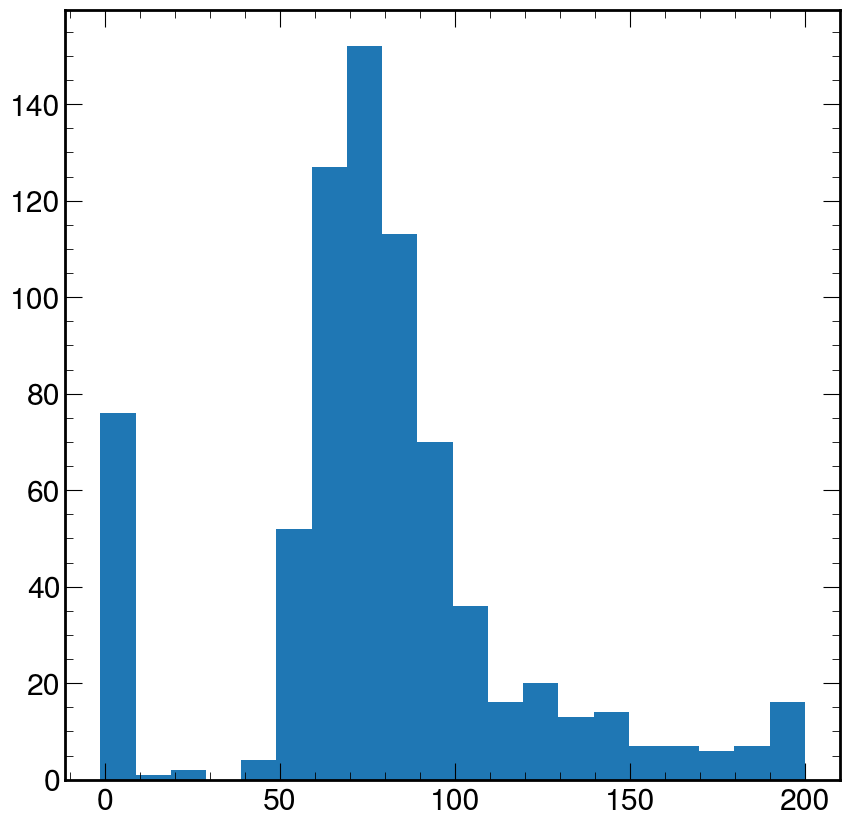

In [58]:
plt.hist(df_Cosmic.ch3_P2P_fit/6.344,bins=20)

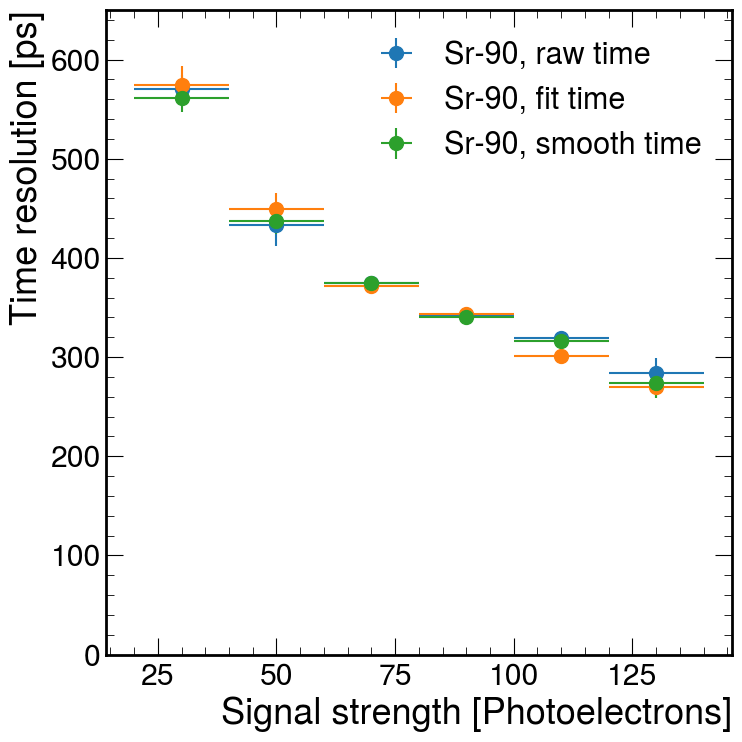

In [61]:
#radioactive, 3 time definitions
fig = plt.figure(figsize=(8,8))
for timedef in "raw fit smooth".split():
    sigma_t  = np.array([])
    sigma_t_error = np.array([])
    centers = np.array([])
    xerrors = np.array([])




    photobins = [20,40, 60,80, 100,120, 140]
    #photobins = [0, 1000]
    #print(photobins)
    limit=6


    dfq=df_Sr#.query(f'ch3_P2P_smooth_PE>{limit} and ch1_chisq<15 and ch2_chisq<15 and ch3_chisq<15')

    for i in range(len(photobins)-1):
        edges = (photobins[i],photobins[i+1])

        hist, bin_edges = np.histogram(dfq.query(f'ch1_P2P_smooth_PE>{edges[0]} and ch1_P2P_smooth_PE<{edges[1]} '+\
                                                f' and ch2_P2P_smooth_PE>{edges[0]} and ch2_P2P_smooth_PE<{edges[1]}')\
                                       .eval(f"ch1_time_{timedef}-ch2_time_{timedef}"),
                                       bins=25,range=(-2.5,2.5))


        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        p0 = [1,0,.5]
        coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                                #(start,end,line quality keep at 100)
        hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

        sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
        sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
        centers = np.append(centers, (edges[0]+edges[1])/2.0)
        xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
    plt.errorbar(centers,y=sigma_t,xerr=xerrors,yerr=sigma_t_error,fmt='o', label=f'Sr-90, {timedef} time',
            markersize=10)
       




plt.legend(fontsize=22)

plt.ylim([0,650])
plt.xlabel('Signal strength [Photoelectrons]')
plt.ylabel('Time resolution [ps]')
plt.tight_layout()
plt.savefig('Nov18Sourcetimestrength_SJP.pdf')
plt.show()
#plt.savefig('Nov18Sourcetimestrength2.png')




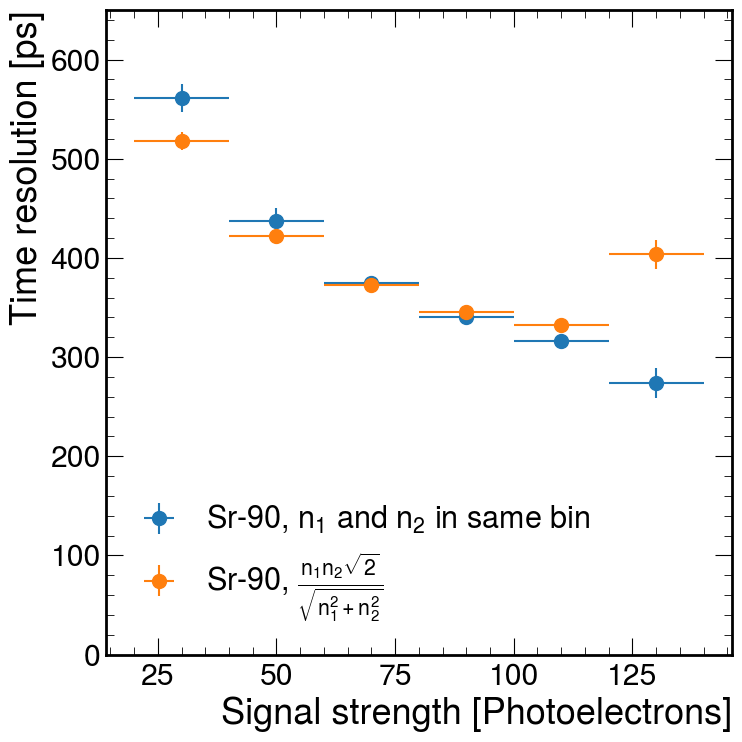

In [75]:
sigma_t  = np.array([])
sigma_t_error = np.array([])
centers = np.array([])
xerrors = np.array([])




photobins = [20,40, 60,80, 100,120, 140]
#photobins = [0, 1000]
#print(photobins)
limit=6

fig = plt.figure(figsize=(8,8))


dfq=df_Sr#.query(f'ch3_P2P_smooth_PE>{limit} and ch1_chisq<15 and ch2_chisq<15 and ch3_chisq<15')

for i in range(len(photobins)-1):
    edges = (photobins[i],photobins[i+1])
        
    hist, bin_edges = np.histogram(dfq.query(f'ch1_P2P_smooth_PE>{edges[0]} and ch1_P2P_smooth_PE<{edges[1]} '+\
                                            f' and ch2_P2P_smooth_PE>{edges[0]} and ch2_P2P_smooth_PE<{edges[1]}')['time_diff'],
                                   bins=25,range=(-2.5,2.5))
    

    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    p0 = [1,0,.5]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
    hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

    sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
    sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
    centers = np.append(centers, (edges[0]+edges[1])/2.0)
    xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
plt.errorbar(centers,y=sigma_t,xerr=xerrors,yerr=sigma_t_error,fmt='o', label='Sr-90, $n_1$ and $n_2$ in same bin',
            markersize=10)


sigma_t  = np.array([])
sigma_t_error = np.array([])
centers = np.array([])
xerrors = np.array([])
for i in range(len(photobins)-1):
    edges = (photobins[i],photobins[i+1])
        
    hist, bin_edges = np.histogram(dfq.query(f'signal_strength>{edges[0]} and signal_strength<{edges[1]}')['time_diff'],
                                   bins=25,range=(-2.5,2.5))
    

    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    p0 = [1,0,.5]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
    hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

    sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
    sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
    centers = np.append(centers, (edges[0]+edges[1])/2.0)
    xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
    

plt.errorbar(centers,y=sigma_t,xerr=xerrors,yerr=sigma_t_error,fmt='o', label='Sr-90, $\\frac{n_1n_2\\sqrt{2}}{\\sqrt{n_1^2+n_2^2}}$',
            markersize=10)







plt.legend(fontsize=22)

plt.ylim([0,650])
plt.xlabel('Signal strength [Photoelectrons]')
plt.ylabel('Time resolution [ps]')
plt.tight_layout()
plt.savefig('Nov18Sourcetimestrength_SJP.pdf')
plt.show()
#plt.savefig('Nov18Sourcetimestrength2.png')




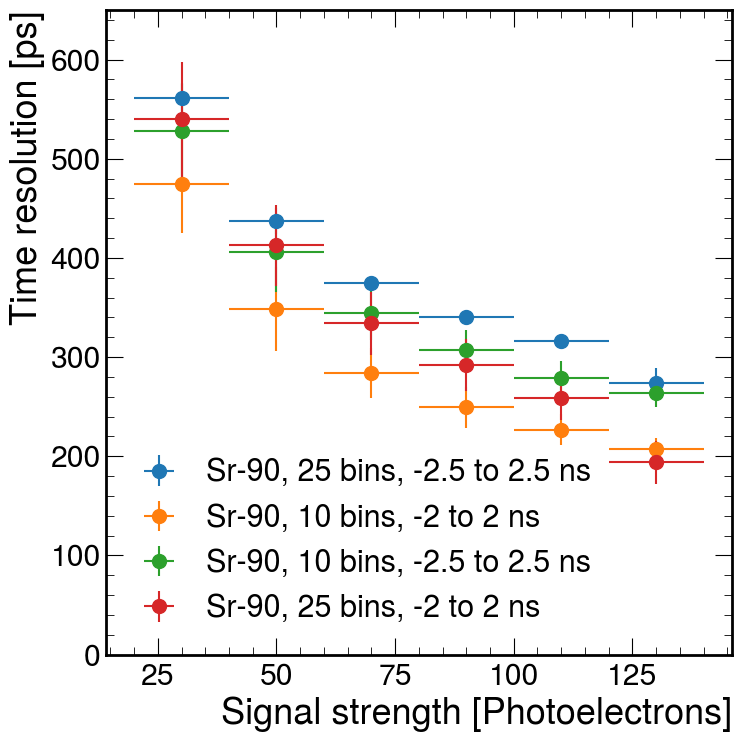

In [79]:
sigma_t  = np.array([])
sigma_t_error = np.array([])
centers = np.array([])
xerrors = np.array([])




photobins = [20,40, 60,80, 100,120, 140]
#photobins = [0, 1000]
#print(photobins)
limit=6

fig = plt.figure(figsize=(8,8))


dfq=df_Sr#.query(f'ch3_P2P_smooth_PE>{limit} and ch1_chisq<15 and ch2_chisq<15 and ch3_chisq<15')

for i in range(len(photobins)-1):
    edges = (photobins[i],photobins[i+1])
        
    hist, bin_edges = np.histogram(dfq.query(f'ch1_P2P_smooth_PE>{edges[0]} and ch1_P2P_smooth_PE<{edges[1]} '+\
                                            f' and ch2_P2P_smooth_PE>{edges[0]} and ch2_P2P_smooth_PE<{edges[1]}')['time_diff'],
                                   bins=25,range=(-2.5,2.5))
    

    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    p0 = [1,0,.5]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
    hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

    sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
    sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
    centers = np.append(centers, (edges[0]+edges[1])/2.0)
    xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
plt.errorbar(centers,y=sigma_t,xerr=xerrors,yerr=sigma_t_error,fmt='o', label='Sr-90, 25 bins, -2.5 to 2.5 ns',
            markersize=10)


sigma_t  = np.array([])
sigma_t_error = np.array([])
centers = np.array([])
xerrors = np.array([])
for i in range(len(photobins)-1):
    edges = (photobins[i],photobins[i+1])
        
    hist, bin_edges = np.histogram(dfq.query(f'ch1_P2P_smooth_PE>{edges[0]} and ch1_P2P_smooth_PE<{edges[1]} '+\
                                            f' and ch2_P2P_smooth_PE>{edges[0]} and ch2_P2P_smooth_PE<{edges[1]}')['time_diff'],
                                   bins=10,range=(-2,2))
    

    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    p0 = [1,0,.5]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
    hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

    sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
    sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
    centers = np.append(centers, (edges[0]+edges[1])/2.0)
    xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
    

plt.errorbar(centers,y=sigma_t,xerr=xerrors,yerr=sigma_t_error,fmt='o', label='Sr-90, 10 bins, -2 to 2 ns',
            markersize=10)


sigma_t  = np.array([])
sigma_t_error = np.array([])
centers = np.array([])
xerrors = np.array([])
for i in range(len(photobins)-1):
    edges = (photobins[i],photobins[i+1])
        
    hist, bin_edges = np.histogram(dfq.query(f'ch1_P2P_smooth_PE>{edges[0]} and ch1_P2P_smooth_PE<{edges[1]} '+\
                                            f' and ch2_P2P_smooth_PE>{edges[0]} and ch2_P2P_smooth_PE<{edges[1]}')['time_diff'],
                                   bins=10,range=(-2.5,2.5))
    

    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    p0 = [1,0,.5]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
    hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

    sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
    sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
    centers = np.append(centers, (edges[0]+edges[1])/2.0)
    xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
    

plt.errorbar(centers,y=sigma_t,xerr=xerrors,yerr=sigma_t_error,fmt='o', label='Sr-90, 10 bins, -2.5 to 2.5 ns',
            markersize=10)


sigma_t  = np.array([])
sigma_t_error = np.array([])
centers = np.array([])
xerrors = np.array([])
for i in range(len(photobins)-1):
    edges = (photobins[i],photobins[i+1])
        
    hist, bin_edges = np.histogram(dfq.query(f'ch1_P2P_smooth_PE>{edges[0]} and ch1_P2P_smooth_PE<{edges[1]} '+\
                                            f' and ch2_P2P_smooth_PE>{edges[0]} and ch2_P2P_smooth_PE<{edges[1]}')['time_diff'],
                                   bins=25,range=(-2,2))
    

    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    p0 = [1,0,.5]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
    hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

    sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
    sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
    centers = np.append(centers, (edges[0]+edges[1])/2.0)
    xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
    

plt.errorbar(centers,y=sigma_t,xerr=xerrors,yerr=sigma_t_error,fmt='o', label='Sr-90, 25 bins, -2 to 2 ns',
            markersize=10)


plt.legend(fontsize=22)

plt.ylim([0,650])
plt.xlabel('Signal strength [Photoelectrons]')
plt.ylabel('Time resolution [ps]')
plt.tight_layout()
plt.savefig('Nov18Sourcetimestrength_SJP.pdf')
plt.show()
#plt.savefig('Nov18Sourcetimestrength2.png')





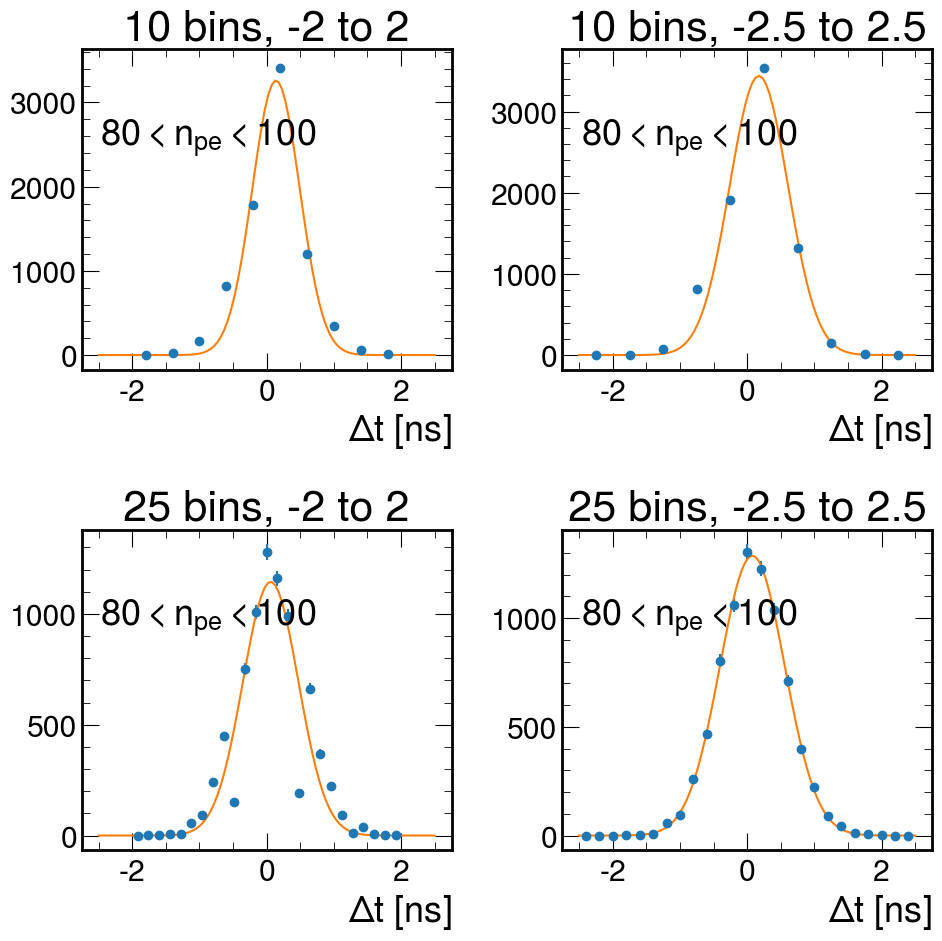

In [92]:
edges=(80,100)
fig, axs=plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        bins=[10,25][i]
        rang=[(-2,2), (-2.5,2.5)][j]
        hist, bin_edges = np.histogram(dfq.query(f'ch1_P2P_smooth_PE>{edges[0]} and ch1_P2P_smooth_PE<{edges[1]} '+\
                                            f' and ch2_P2P_smooth_PE>{edges[0]} and ch2_P2P_smooth_PE<{edges[1]}')['time_diff'],
                                   bins=bins,range=rang)
    

        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
        p0 = [1,0,.5]
        coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                                #(start,end,line quality keep at 100)
        hist_fit = gauss(np.linspace(-2, 2, 100), *coeff)

        sigma_t = np.append(sigma_t, 1000.0*abs(coeff[2])/np.sqrt(2)) #divide by sqrt(2) to transform to single detector resolution?
        sigma_t_error = np.append(sigma_t_error, 1000.0*np.sqrt(var_matrix[2][2])/np.sqrt(2))
        centers = np.append(centers, (edges[0]+edges[1])/2.0)
        xerrors = np.append(xerrors, (edges[1]-edges[0])/2.0)
        
        axs[i][j].errorbar(bin_centers, hist, np.sqrt(hist), linestyle='', marker='o')
        x=np.linspace(-2.5, 2.5, 100)
        axs[i][j].plot(x, coeff[0]*np.exp(-(x-coeff[1])**2/(2*coeff[2]**2)), linestyle='-')
        axs[i][j].set_title(f"{bins} bins, {rang[0]} to {rang[1]}")
        axs[i][j].set_xlabel("$\\Delta t$ [ns]")
        axs[i][j].text(0.05, 0.7, f"${edges[0]}<n_{{pe}}<{edges[1]}$", transform=axs[i][j].transAxes)
plt.tight_layout()
plt.show()

Text(1, 0, 'time diff [ns]')

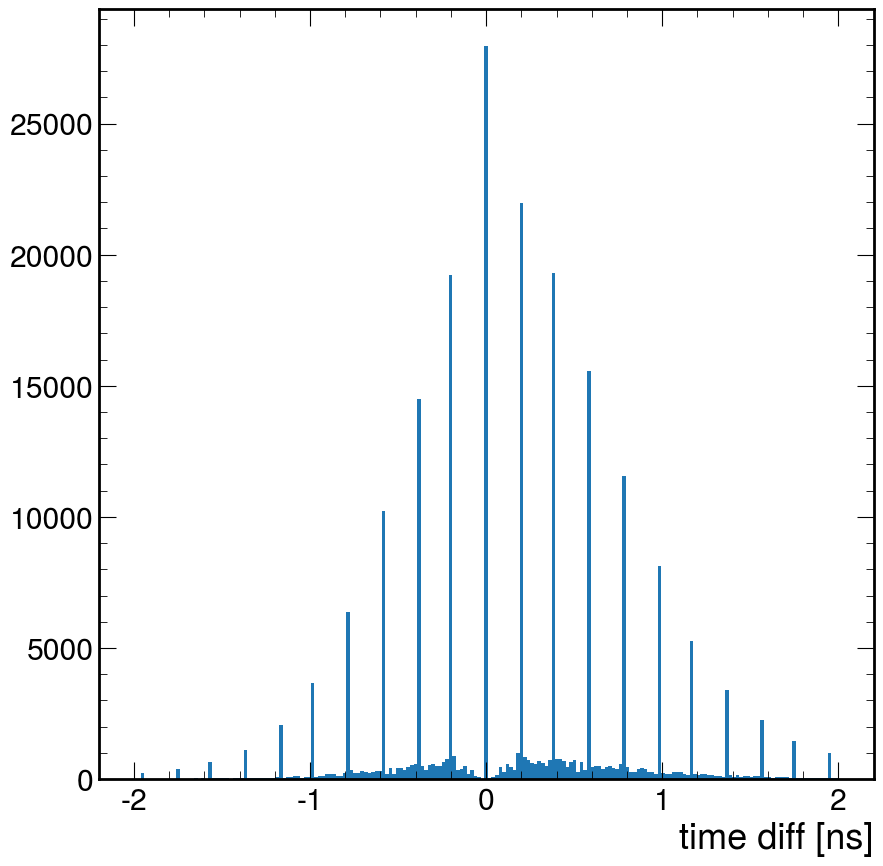

In [96]:
plt.hist(dfq['time_diff'],bins=np.linspace(-2,2,200))
plt.xlabel("time diff [ns]")

0.15197471841839794 0.5931794765453553
-0.03487360980545848 0.44633517185785665
-0.07337669148895362 0.5980240459463813
0.025950113156186172 -0.5048660787300867
-0.1121749324327975 0.6019489419775521
-0.030026865539401402 0.4974489667882943
-0.22646513489761017 0.6011968763832585
-0.09117533124902605 0.5127083021087413
-0.41032286006477675 0.6112338817690935
-0.11935216161181106 0.5417773295493268


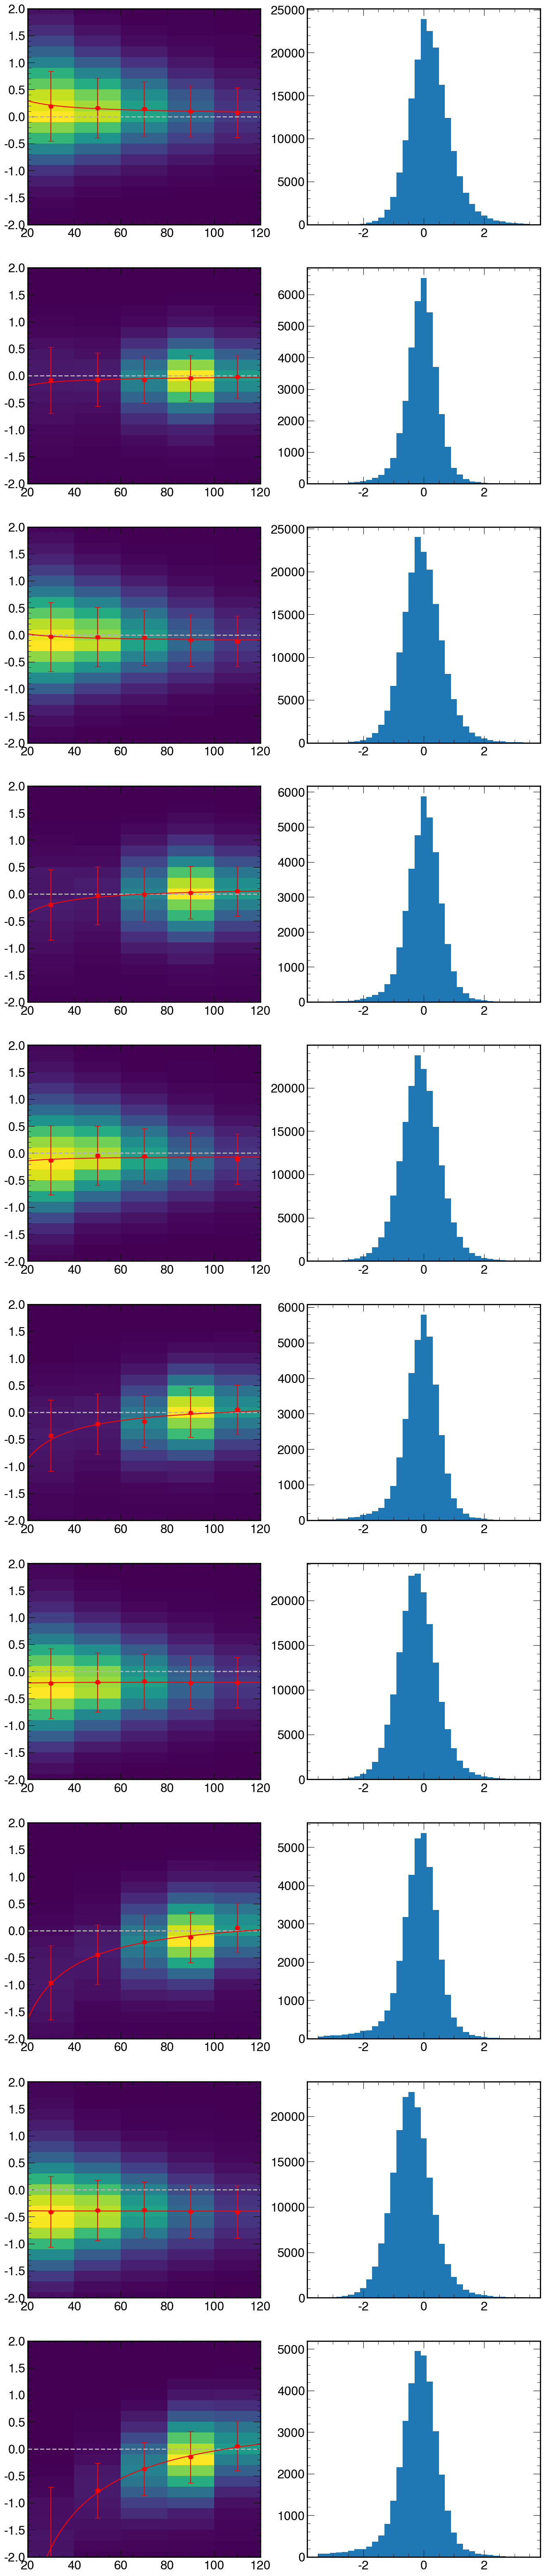

In [263]:
niter=10
fig,axs=plt.subplots(niter,2, figsize=(16,8*niter))
dfq=df_Sr


A=np.array([0,0])
B=0
for i in range(niter):
    ch=1+i%2
    ch_other=1+((i+1)%2)
    plt.sca(axs[i][0])
    mus=[]
    sigmas=[]
    dmus=[]
    dsigmas=[]
    dfq=df_Sr.query(f"ch{ch_other}_P2P_smooth_PE>80")
    hist, x, y, _=plt.hist2d(dfq[f'ch{ch}_P2P_smooth_PE'], 
                             dfq.eval(f'time_diff-{A[0]}-{A[1]}/ch1_P2P_smooth_PE+{B}/ch2_P2P_smooth_PE'), bins=(5,35), range=((20, 120),(-3.5, 3.5)))
    bin_centers=(y[1:]+y[:-1])/2
    for j in range(len(hist)):
        start,stop=11,-11
        if j==5:
            start,stop=13,-13
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[j][start:stop], p0=p0)
                                #(start,end,line quality keep at 100)

        #redo the fit with the range determined by 2.5 sigma of the previous fit
        start=int(len(bin_centers)/2-2.5*abs(coeff[2])/(bin_centers[1]-bin_centers[0]))
        stop=-start
        #print("start,stop=",start,stop)
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[j][start:stop], p0=p0)
        mus.append(coeff[1])
        sigmas.append(coeff[2])
        dmus.append(np.sqrt(var_matrix[1][1]))
        dsigmas.append(np.sqrt(var_matrix[2][2]))
    centers=(x[1:]+x[:-1])/2
    plt.errorbar(centers,mus, sigmas, color='red', linestyle='', marker='s', capsize=5)
    plt.errorbar(centers,mus, dmus, color='red', linestyle='', marker='s', capsize=5)
    plt.ylim(-2.0, 2.0)

    plt.axhline(0, linestyle='--', linewidth=2, color='0.7')


    def twc(x, *p):
        
        return p[0]+p[1]/x#+p[2]/x**2
    #print(centers, mus, dmus)
    coeff, var_matrix = curve_fit(twc, centers, mus, p0=[0.1,0],sigma=dmus)

    #print(np.sqrt(var_matrix[0][0]))

    x=np.linspace(20, 140, 100)
    curve= plt.plot(x, twc(x, *coeff),label=f"fit", color='red')
    
    #print(sigmas)
    
    
    plt.sca(axs[i][1])
    hist, x,_=plt.hist(dfq.eval(f'time_diff-{A[0]}-{A[1]}/ch1_P2P_smooth_PE+{B}/ch2_P2P_smooth_PE'), bins=35, range=(-3.5, 3.5))
    bin_centers=(y[1:]+y[:-1])/2
    start,stop=11,-11
    coeffg, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0)
                            #(start,end,line quality keep at 100)
    #redo the fit with the range determined by 2.5 sigma of the previous fit
    start=int(len(bin_centers)/2-2.5*abs(coeffg[2])/(bin_centers[1]-bin_centers[0]))
    stop=-start
    #print("start,stop=",start,stop)
    coeffg, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=coeffg)
    print(coeffg[1],coeffg[2])
    if ch==1:
        A=A+coeff
    else :
        B+=coeff[1]

0.12000195885222151 0.5828941932115287
-0.04047603312658241 0.5768370445153914
-0.06722250882160292 0.5703507411781642
0.015950342215736282 -0.5815484519972983
-0.07999037772748294 -0.5846420961473188
0.009183874836919305 0.5855487220542719
-0.07294526648994587 0.5729582550548384
0.0037545732786050047 0.5838118197584756
-0.07927870697894009 0.5820825685405514
0.010367042093920508 0.5853001646234911


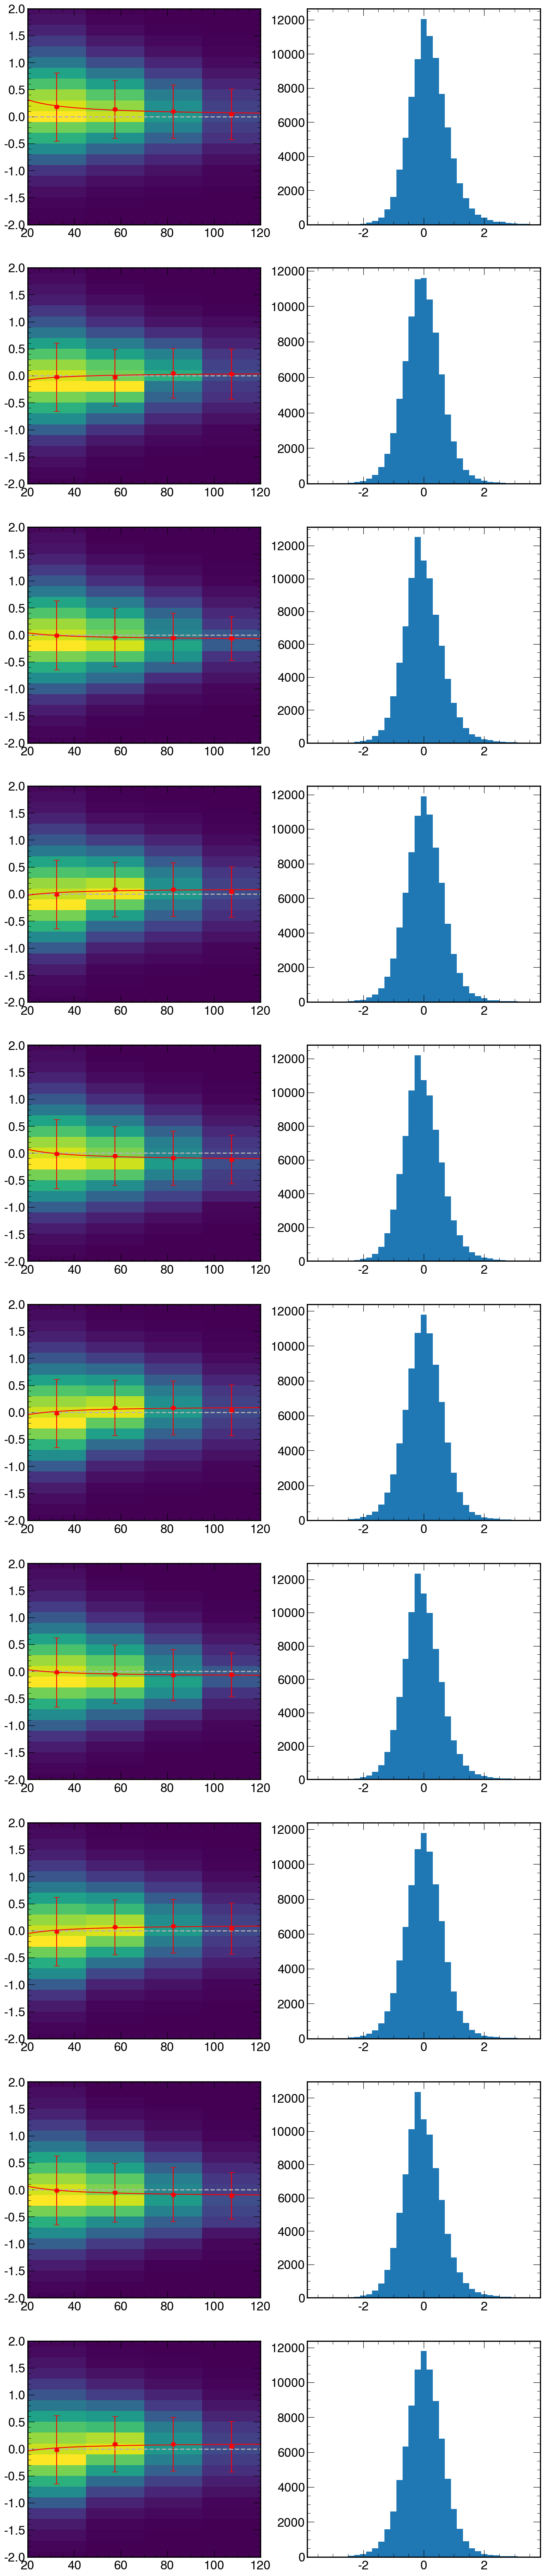

In [309]:
niter=10
fig,axs=plt.subplots(niter,2, figsize=(16,8*niter))
dfq=df_Sr


A=np.array([0,0])
for i in range(niter):
    ch=1
    ch_other=2
    plt.sca(axs[i][0])
    mus=[]
    sigmas=[]
    dmus=[]
    dsigmas=[]
    dfq=df_Sr.query(f"ch{ch_other}_P2P_smooth_PE>80 and ch{ch_other}_P2P_smooth_PE<100")
    hist, x, y, _=plt.hist2d(dfq[f'ch{ch}_P2P_smooth_PE'], 
                             dfq.eval(f'time_diff-({A[0]}+{A[1]}/ch1_P2P_smooth_PE)'), bins=(4,35), range=((20, 120),(-3.5, 3.5)))
    dhist = np.sqrt(hist)+(hist==0)
    bin_centers=(y[1:]+y[:-1])/2
    for j in range(len(hist)):
        start,stop=11,-11
        if j==5:
            start,stop=13,-13
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[j][start:stop], p0=p0, sigma=dhist[j][start:stop])
                                #(start,end,line quality keep at 100)

        #redo the fit with the range determined by 2.5 sigma of the previous fit
        start=int(len(bin_centers)/2-2.5*abs(coeff[2])/(bin_centers[1]-bin_centers[0]))
        stop=-start
        #print("start,stop=",start,stop)
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[j][start:stop], p0=p0, sigma=dhist[j][start:stop])
        mus.append(coeff[1])
        sigmas.append(coeff[2])
        dmus.append(np.sqrt(var_matrix[1][1]))
        dsigmas.append(np.sqrt(var_matrix[2][2]))
    centers=(x[1:]+x[:-1])/2
    plt.errorbar(centers,mus, sigmas, color='red', linestyle='', marker='s', capsize=5)
    plt.errorbar(centers,mus, dmus, color='red', linestyle='', marker='s', capsize=5)
    plt.ylim(-2.0, 2.0)

    plt.axhline(0, linestyle='--', linewidth=2, color='0.7')


    def twc(x, *p):
        
        return p[0]+p[1]/x
    #print(centers, mus, dmus)
    coeff, var_matrix = curve_fit(twc, centers, mus, p0=[0,0],sigma=dmus)

    #print(np.sqrt(var_matrix[0][0]))

    x=np.linspace(20, 140, 100)
    curve= plt.plot(x, twc(x, *coeff),label=f"fit", color='red')
    
    #print(sigmas)
    
    
    plt.sca(axs[i][1])
    hist, x,_=plt.hist(dfq.eval(f'time_diff-({A[0]}+{A[1]}/ch1_P2P_smooth_PE)'), bins=35, range=(-3.5, 3.5))
    bin_centers=(y[1:]+y[:-1])/2
    start,stop=11,-11
    coeffg, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0)
                            #(start,end,line quality keep at 100)
    #redo the fit with the range determined by 2.5 sigma of the previous fit
    start=int(len(bin_centers)/2-2.5*abs(coeffg[2])/(bin_centers[1]-bin_centers[0]))
    stop=-start
    #print("start,stop=",start,stop)
    coeffg, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=coeffg)
    print(coeffg[1],coeffg[2])
    A=A+coeff
    

making plot
85773
0.917524053529887
0.2981355127580439 0.04259078753686341
85773
0.9011660776309004
0.15888384782806475 0.022697692546866394


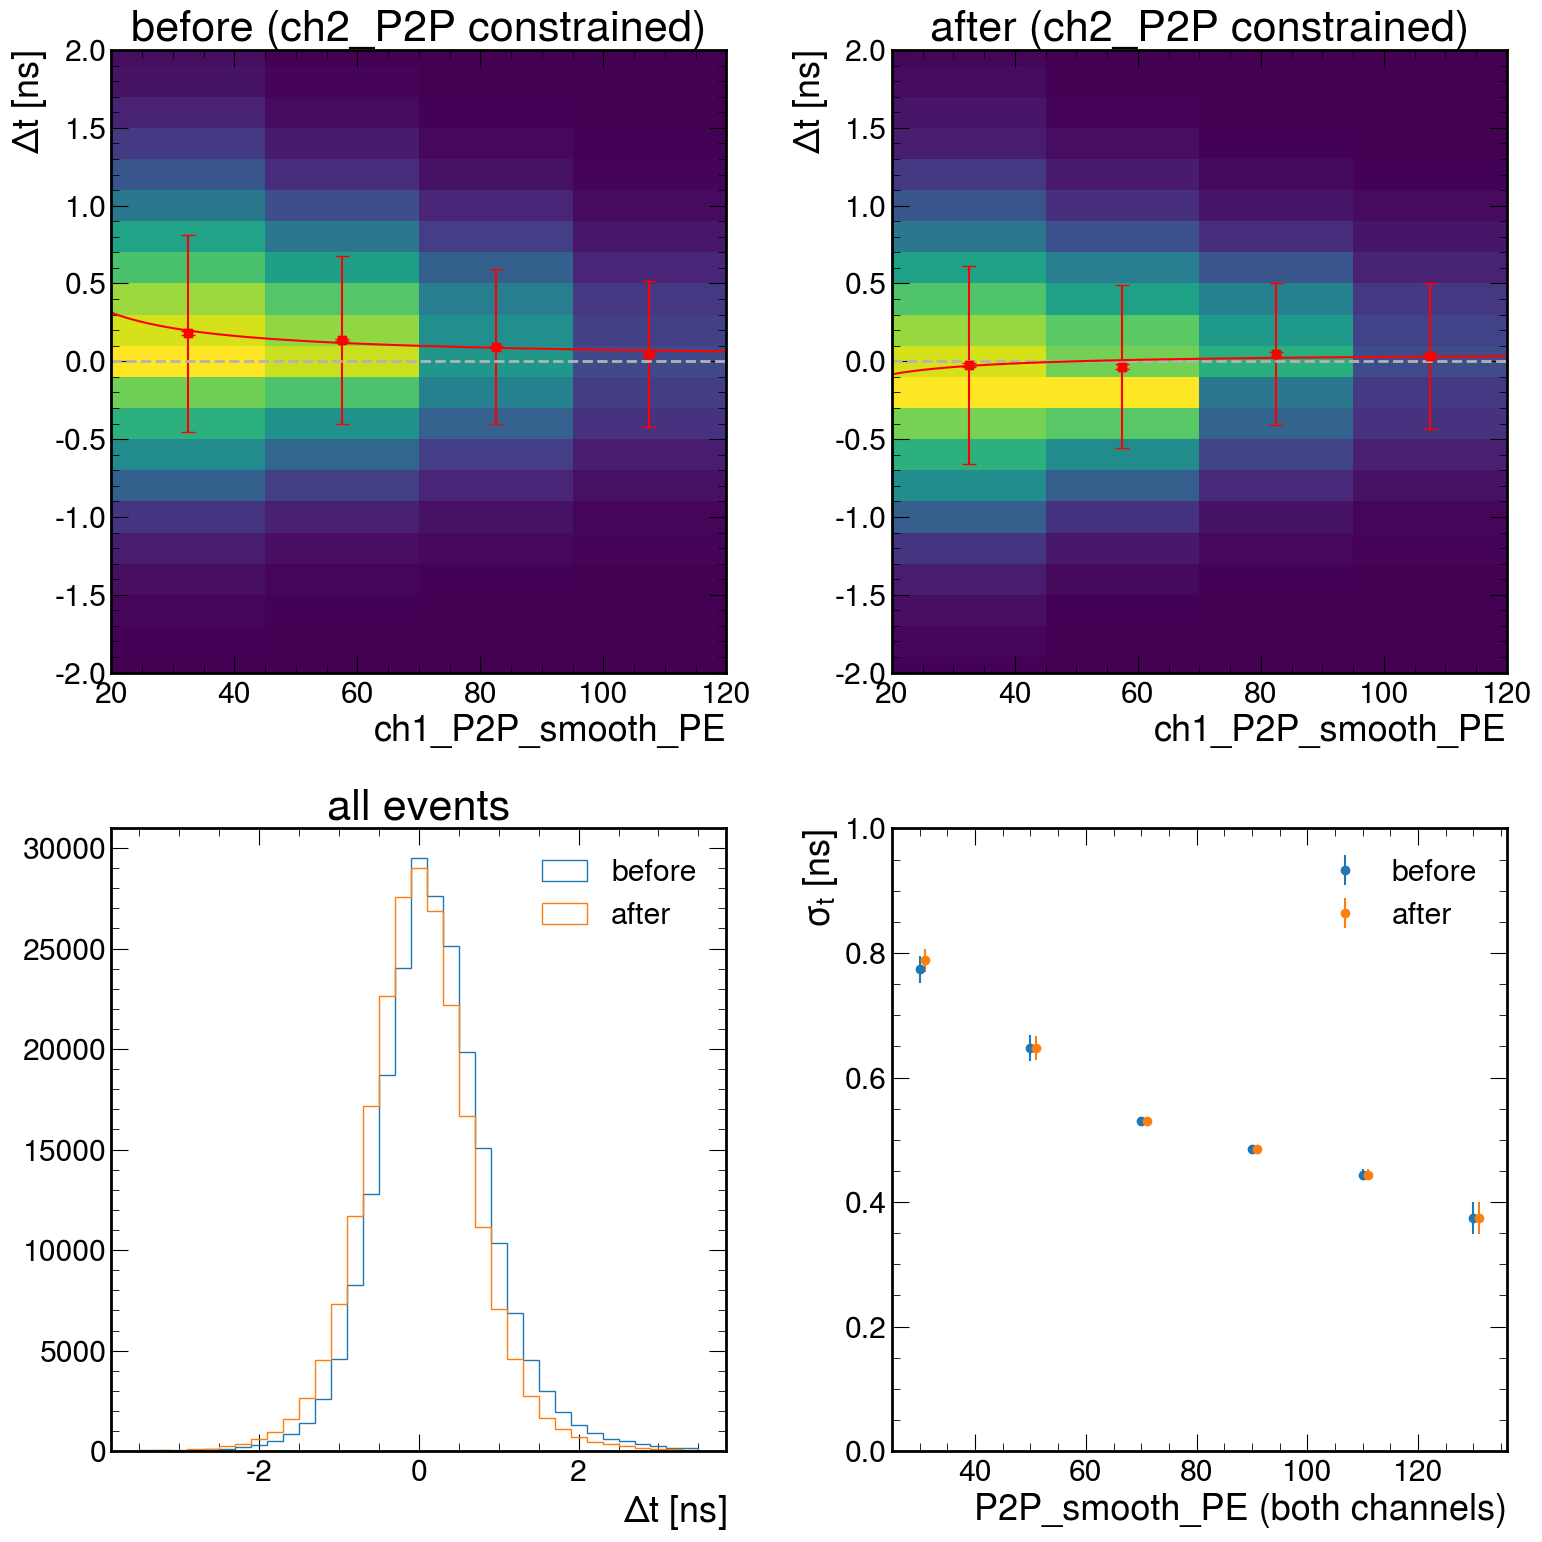

In [63]:
print('making plot')
from scipy.optimize import curve_fit
fig,axs=plt.subplots(2,2, figsize=(16,16))
dfq=df_Sr
niter=2
A=np.array([0,0])
for i in range(niter):
    ch=1
    ch_other=2
    plt.sca(axs[i][0])
    mus=[]
    sigmas=[]
    dmus=[]
    dsigmas=[]
    if i == 0:
        plt.sca(axs[0][0])
        plt.title("before (ch2_P2P constrained)")
    if i == 1:
        plt.sca(axs[0][1])
        plt.title("after (ch2_P2P constrained)")
    dfq=df_Sr.query(f"ch{ch_other}_P2P_smooth_PE>80 and ch{ch_other}_P2P_smooth_PE<100")
    print(len(dfq))
    hist, x, y, _=plt.hist2d(dfq[f'ch{ch}_P2P_smooth_PE'], 
                             dfq.eval(f'time_diff-({A[0]}+{A[1]}/ch1_P2P_smooth_PE)'), bins=(4,35), range=((20, 120),(-3.5, 3.5)))
    dhist = np.sqrt(hist)+(hist==0)
    bin_centers=(y[1:]+y[:-1])/2
    for j in range(len(hist)):
        start,stop=11,-11
        if j==5:
            start,stop=13,-13
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[j][start:stop], p0=p0, sigma=dhist[j][start:stop])
                                #(start,end,line quality keep at 100)

        #redo the fit with the range determined by 2.5 sigma of the previous fit
        start=int(len(bin_centers)/2-2.5*abs(coeff[2])/(bin_centers[1]-bin_centers[0]))
        stop=-start
        #print("start,stop=",start,stop)
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[j][start:stop], p0=p0, sigma=dhist[j][start:stop])
        mus.append(coeff[1])
        sigmas.append(coeff[2])
        dmus.append(np.sqrt(var_matrix[1][1]))
        dsigmas.append(np.sqrt(var_matrix[2][2]))
    centers=(x[1:]+x[:-1])/2
    
    plt.errorbar(centers,mus, sigmas, color='red', linestyle='', marker='s', capsize=5)
    plt.errorbar(centers,mus, dmus, color='red', linestyle='', marker='s', capsize=5)
    plt.ylim(-2.0, 2.0)

    plt.axhline(0, linestyle='--', linewidth=2, color='0.7')


    def twc(x, *p):
        
        return p[0]+p[1]/x
    #print(centers, mus, dmus)
    coeff, var_matrix = curve_fit(twc, centers, mus, p0=[0,0],sigma=dmus)

    #print(np.sqrt(var_matrix[0][0]))

    x=np.linspace(20, 140, 100)
    curve= plt.plot(x, twc(x, *coeff),label=f"fit", color='red')
    
    #print(sigmas)
    
    
    plt.sca(axs[1][0])
    
    a= df_Sr.eval(f'time_diff-{A[1]}/ch1_P2P_smooth_PE+{A[1]}/ch2_P2P_smooth_PE-{A[1]/90}')
    print(np.std(a))
    hist, x,_=plt.hist(a, bins=35, range=(-3.5, 3.5),
                      histtype='step', label=("before" if i == 0 else "after"))
    bin_centers=(y[1:]+y[:-1])/2
    start,stop=11,-11
    coeffg, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0)
                            #(start,end,line quality keep at 100)
    #redo the fit with the range determined by 2.5 sigma of the previous fit
    start=int(len(bin_centers)/2-2.5*abs(coeffg[2])/(bin_centers[1]-bin_centers[0]))
    stop=-start
    #print("start,stop=",start,stop)
    coeffg, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=coeffg)
    
    A=A+coeff
    
    #now for the before/after sigma comparison
    mus=[]
    sigmas=[]
    dmus=[]
    dsigmas=[]
    partitions = np.linspace(20, 140, 7)
    for j in range(len(partitions)-1):
        dfq=df_Sr.query(f"ch1_P2P_smooth_PE>{partitions[j]} and ch2_P2P_smooth_PE>{partitions[j]}" +
                        f" and ch1_P2P_smooth_PE<{partitions[j+1]} and ch2_P2P_smooth_PE<{partitions[j+1]}")
        hist,x = np.histogram(dfq.eval(f'time_diff-({A[0]}+{A[1]}/ch1_P2P_smooth_PE)+({A[0]}+{A[1]}/ch2_P2P_smooth_PE)'),
                             bins=35, range=(-3.5, 3.5))
        dhist = np.sqrt(hist)+(hist==0)
        
        bin_centers=(x[1:]+x[:-1])/2
        start,stop=11,-11
        if j==5:
            start,stop=13,-13
        coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0, sigma=dhist[start:stop])
                                #(start,end,line quality keep at 100)

        #redo the fit with the range determined by 2.5 sigma of the previous fit
        start=int(len(bin_centers)/2-2.5*abs(coeff[2])/(bin_centers[1]-bin_centers[0]))
        stop=-start
        #print("start,stop=",start,stop)
        try:
            coeff, var_matrix = curve_fit(gauss, bin_centers[start:stop], hist[start:stop], p0=p0, sigma=dhist[start:stop])
        except:
            sigmas.append(np.std(dfq.eval()))
            dsigmas.append(0)
            continue
        mus.append(coeff[1])
        sigmas.append(coeff[2])
        dmus.append(np.sqrt(var_matrix[1][1]))
        dsigmas.append(np.sqrt(var_matrix[2][2]))
    centers=(partitions[1:]+partitions[:-1])/2
    print(A[1]/20, A[1]/140)
    axs[1][1].errorbar(centers+1*i, np.abs(sigmas), dsigmas, label="before" if i == 0 else "after", linestyle='',
                      marker='o')
    
    
axs[1][1].legend()
axs[1][0].legend()
axs[1][1].set_ylim(0, 1)
axs[0][0].set_ylabel("$\Delta t$ [ns]")
axs[0][1].set_ylabel("$\Delta t$ [ns]")
axs[0][0].set_xlabel("ch1_P2P_smooth_PE")
axs[0][1].set_xlabel("ch1_P2P_smooth_PE")
axs[1][0].set_title("all events")
axs[1][0].set_xlabel("$\Delta t$ [ns]")

axs[1][1].set_ylabel("$\\sigma_t$ [ns]")
axs[1][1].set_xlabel("P2P_smooth_PE (both channels)")

plt.tight_layout()
plt.show()